<a href="https://colab.research.google.com/github/ha-yun/GSTEC/blob/main/210819.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션


In [ ]:
# projectapp/templates/projectapp/list.html
                <span class="m-2 NNS_B">{{ project.name | truncatechars:10 }}</span>

In [ ]:
# In View Using Mixin
# projectapp/templates/projectapp/detail.html
    <div>
        {% include 'snippets/list_fragment.html' with article_list=object_list %}
    </div>


In [ ]:
# projectapp/views.py
class ProjectDetailView(DetailView, MultipleObjectMixin):
    model = Project
    context_object_name = 'target_project'
    template_name = 'projectapp/detail.html'

    paginate_by = 20

    def get_context_data(self, **kwargs):
        article_list = Article.objects.filter(project=self.object)
        return super().get_context_data(object_list=article_list, **kwargs)



In [ ]:
# templates/snippets/list_fragment.html
{% load static %}

    <style>
        .container{
            padding: 0;
            margin: 0 auto;
        }
        .container div {
          width: 45%;
          background-color: lightseagreen;
          max-width: 250px;
            box-shadow: 0 0 .5rem cadetblue;
          display: flex;
          justify-content: center;
          align-items: center;
          border-radius: 1rem;
            flex-direction: column;
        }
    .container img{
        width: 100%;
        border-radius: 1rem;
    }
    </style>


    <!DOCTYPE html>
    <div class="container my-4">

        {% for article in article_list %}
            <div>
                <a href="{% url 'articleapp:detail' pk=article.pk %}">
                    <img src="{{ article.image.url }}"
                         alt="">
                </a>
            <span>{{ article.title }}</span>
            </div>
        {% endfor %}

    </div>

    <script src="{% static 'js/magicgrid.js' %}"></script>

    {% include 'snippets/pagination.html' %}

    <div class="text-center my-5">
        <a href="{% url 'articleapp:create' %}"
        class="btn btn-dark rounded-pill material-icons">
            brush
        </a>
        <a href="{% url 'articleapp:create' %}"
        class="btn btn-outline-dark rounded-pill px-5">
            Create Article
        </a>
    </div>

In [ ]:
# accountapp/templates/accountapp/detail.html
    <div>
        {% include 'snippets/list_fragment.html' with article_list=object_list %}
    </div>

In [ ]:
# accountapp/views.py
class AccountDetailView(DetailView, MultipleObjectMixin):
    model = User
    context_object_name = 'target_user'
    template_name = 'accountapp/detail.html'

    paginate_by = 20

    def get_context_data(self, **kwargs):
        article_list = Article.objects.filter(writer=self.object)
        return super().get_context_data(object_list=article_list, **kwargs)

# 2. 알고리즘


#### 백준 2745

In [ ]:
## 1
N, B = input().split()
B = int(B)
N = list(N)
total = 0
j = -1

for i in range(len(N)):
  if N[j].isdigit()==True:
    idx = int(N[j])
  else:
    idx = ord(N[j]) - ord('A') + 10
  j -= 1
  total += idx*B**i
print(total)

ZZZZZ 36
60466175


In [ ]:
## 2
N, B = input().split()
B = int(B)
N = list(N)
total = 0
j = -1
i = 0

def rec(N, B, i, j, total):
  if i >=len(N):
    return total
  elif N[j].isdigit() == True:
    idx=int(N[j])
  else:
    idx = ord(N[j]) - ord('A') + 10
  total += idx*B**i
  return rec(N, B, i+1, j-1, total)

print(rec(N, B, i, j, total))

0 10


0

#### 백준 11005

In [ ]:
N, B = map(int,input().split())
i = 0
NB = []
if N==0:
  NB.append(str(0))
else:
  while N>0:
    n = N%B
    N = N//B
    if n>9:
      NB.append(chr(n+ord('A')-10))
    else:
      NB.append(str(n))

NB.reverse()
print(''.join(NB))


# n, b = map(int, input().split())
# result_list = []
# q = n

# char_map_str = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# while q > 0:
#     q, r = divmod(q, b)
#     # 1)
#     if r < 10:
#         result_list.append(str(r))
#     else:
#         # r => 10 ~ 35
#         # r-10 => 0 ~ 25
#         # r-10+ord('A') => ord('A') ~ ord('Z')
#         # chr(r-10+ord('A')) => 'A' ~ 'Z'

#         result_list.append(chr(r-10+ord('A')))
    
#     # 2)
#     # result_list.append(char_map_str[r])

# print("".join(result_list[::-1]))

123 10
123


#### 백준 5585

In [ ]:
N = 1000 - int(input())
wallet = [500, 100, 50, 10, 5, 1]
cnt = 0
i = 0

while N>0:
  if wallet[i] <= N:
    cnt+=1
    N = N-wallet[i]
  else:
    i+=1
print(cnt)


# n = 1000 - int(input())
# coin_list = [500,100,50,10,5,1]
# def calc_coin(i, coin_list, remain):
#     if i == len(coin_list):
#         return 0

#     return remain // coin_list[i] + calc_coin(i+1, coin_list, remain % coin_list[i])

# print(calc_coin(0, coin_list, n))

1
15


#### 백준 1931

In [3]:
# 회의실 배정

# 한 개의 회의실이 있는데 이를 사용하고자 하는 N개의 회의에 대하여 회의실 사용표를 만들려고 한다. 
# 각 회의 I에 대해 시작시간과 끝나는 시간이 주어져 있고, 각 회의가 겹치지 않게 하면서 회의실을 사용할 수 있는 회의의 최대 개수를 찾아보자. 
# 단, 회의는 한번 시작하면 중간에 중단될 수 없으며 한 회의가 끝나는 것과 동시에 다음 회의가 시작될 수 있다. 
# 회의의 시작시간과 끝나는 시간이 같을 수도 있다.
#  이 경우에는 시작하자마자 끝나는 것으로 생각하면 된다.

# 입력
# 첫째 줄에 회의의 수 N(1 ≤ N ≤ 100,000)이 주어진다. 
# 둘째 줄부터 N+1 줄까지 각 회의의 정보가 주어지는데 이것은 공백을 사이에 두고 회의의 시작시간과 끝나는 시간이 주어진다. 
# 시작 시간과 끝나는 시간은 231-1보다 작거나 같은 자연수 또는 0이다.


# 출력
# 첫째 줄에 최대 사용할 수 있는 회의의 최대 개수를 출력한다.

n = int(input())
meet_time = []

for _ in range(n):
    start_time, end_time = map(int, input().split())
    meet_time.append((end_time, start_time))

result_meet_cnt = 1
meet_time.sort()
last_meet_end_time = meet_time[0][0]

for meet in meet_time[1:]:
    end_time, start_time = meet

    if last_meet_end_time <= start_time:
        last_meet_end_time = end_time
        result_meet_cnt += 1
print(result_meet_cnt)

11
1 4
3 5
0 6
5 7
3 8
5 9
6 10
8 11
8 12
2 13
12 14
4


# 4. 머신러닝

# XGBoost (extreme gradient boosting)

- GBM을 개선하여 속도를 높인 것 (병렬 수행 및 다양한 기능으로)
- 일반적인 GBM에 비해 수행 시간이 빠른 것이지 다른 머신러닝 알고리즘에 비해서 빠르다는 의미는 아님 (랜덤 포레스트)
- 과적합 규제 기능 지원
- 결손값을 자체 처리할 수 있는 기능 지원

[XGBClassifier()](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수, 지정된 횟수만큼 반복적으로 학습 오류를 감소시며 학습을 진행(조기중단 미지원)
- learning_rate : 오차를 보정하는 정도
- max_depth : 트리의 최대 깊이

- subsample : 데이터 샘플링 비율을 지정, 보통 0.5~1 사이의 값을 사용 <br>
 트리가 커져서 과적합되는 것을 제어하기 위함
- reg_alpha : L1 regularization 적용값
- reg_lambda : L2 regularization 적용값
- n_jobs : xgboost를 실행하는 데 사용되는 병렬 스레드 수

In [ ]:
import xgboost
xgboost.__version__

'0.90'

#### XGBoost 실습 01

유방암 데이터를 이용

0.9976525821596244 0.986013986013986


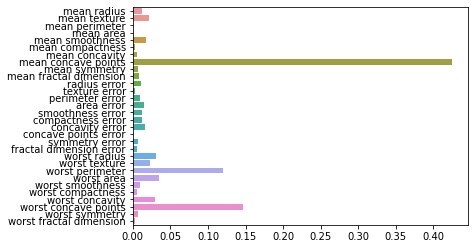

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 데이터 로드
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0)
# 모델 학습
model = XGBClassifier(random_state=0, max_depth=3, learning_rate=0.01, n_estimators=400)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

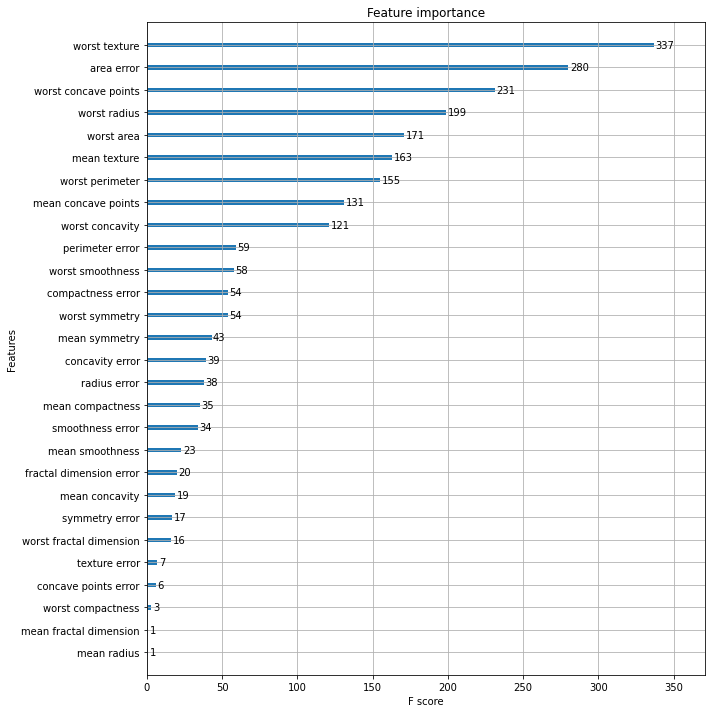

In [ ]:
# plot_importance() 이용
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots( figsize=(10,12) )
plot_importance(model, ax=ax)

In [ ]:
# 모델 학습 (조기중단을 수행)
model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=0)
evals = [(X_test, y_test)]
model.fit(X_train, y_train, 
          eval_set=evals, 
          eval_metric='logloss', 
          early_stopping_rounds=50)

1.0 0.9790209790209791


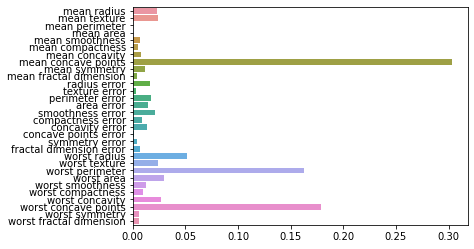

In [ ]:
# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

- 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 있음

# LightGBM

- XGBoost 보다 학습에 걸리는 시간이 훨씬 적음
- 메모리 사용량도 상대적으로 적음
- XGBoost와 비교하여 예측 성능에 별다른 차이가 없음
- 적은 데이터 세트에 적용할 경우 과적합 발생이 쉬움 <br>
 (일반적으로 10,000 건 이하의 데이터 세트로 공식문서에 기술)
- 균형 트리분할(Level Wise) 방식이 아닌 리프중심 트리분할(Leaf Wise) 방식을 사용


<center>
 <img src="https://blog.kakaocdn.net/dn/UI31I/btqCpRmVipf/dZOeXysFGspk2ukY7tGJb0/img.jpg" alt="트리분할" width="60%" />

</center>

균형 트리분할(Level Wise)

- 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리분할(Level Wise) 방식을 사용
- 균형 잡힌 트리는 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문
- 균형을 맞추기 위한 시간이 추가로 필요

리프중심 트리분할(Leaf Wise)

- 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할
- 트리의 깊이가 깊어지고 비대칭적인 규칙 트리를 생성
- 학습을 반복할 수록 균형트리분할 방식보다 예측 오류 손실을 최소화 할 수 있음

[LGBMClassifier()](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수, 지정된 횟수만큼 반복적으로 학습 오류를 감소시며 학습을 진행(조기중단 미지원)
- learning_rate : 오차를 보정하는 정도
- max_depth : 트리의 최대 깊이

- subsample : 데이터 샘플링 비율을 지정, 보통 0.5~1 사이의 값을 사용 <br>
 트리가 커져서 과적합되는 것을 제어하기 위함
- reg_alpha : L1 regularization 적용값
- reg_lambda : L2 regularization 적용값
- n_jobs : xgboost를 실행하는 데 사용되는 병렬 스레드 수

- **num_leaves : 개별 트리가 가질 수 있는 최대 리프의 수 <br>
(높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델 복잡도가 증가, 과대적합 가능성 증가)**
- **min_child_samples : 결정 트리의 min_samples_leaf와 같은 파라미터**

#### LightGBM 설치하기

- 32bit python 에서는 설치되지 않음. 64bit Python 혹은 Anaconda 환경에서 설치

[Conda 이용하기](https://anaconda.org/conda-forge/lightgbm)


Anaconda Prompt (Anaconda3) 관리자 권한으로 실행
```
conda install -c conda-forge lightgbm
```

In [ ]:
import lightgbm
lightgbm.__version__

'2.2.3'

#### LightGBM 실습 01

유방암 데이터를 이용

0.9976525821596244 0.972027972027972


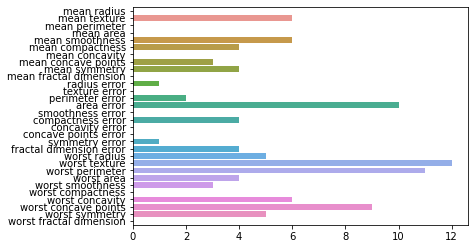

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0)
# 모델 학습
model = LGBMClassifier(random_state=0, max_depth=1, learning_rate=0.2, n_estimators=100)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

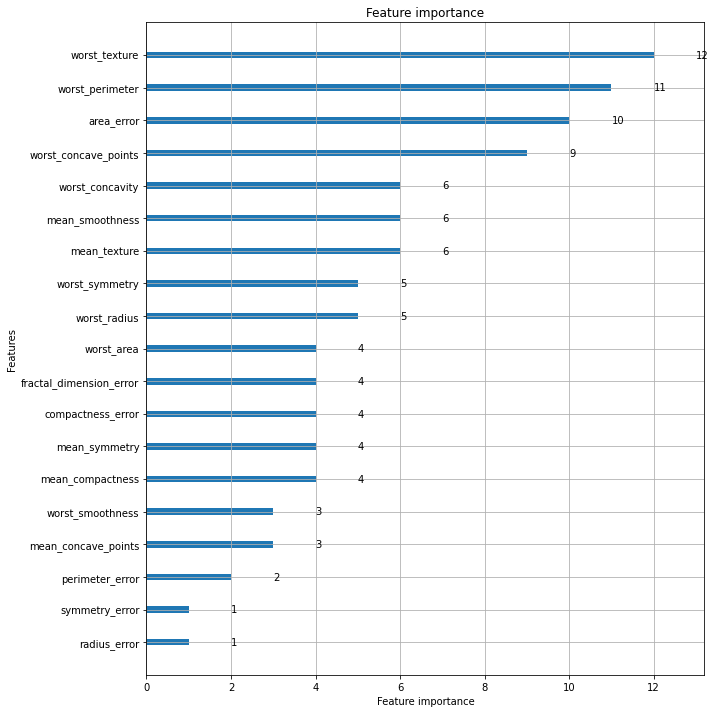

In [ ]:
# plot_importance() 이용
import matplotlib.pyplot as plt
from lightgbm import plot_importance

fig, ax = plt.subplots( figsize=(10,12) )
plot_importance(model, ax=ax)

#### Tip

NGBoost (Natural Gradient Boost)

- 앤드류 응 교수가 속해있는 스탠퍼드 ML Group에서 최근 발표한 부스팅 알고리즘 (2019년 10월 9일에 발표)

장단점

- NGBoost는 XGBoost나 LightBoost보다 성능이 조금 더 좋음
- 확률적인 예측을 해줌 (예측의 불확실성을 측정)

- XGBoost, LightGBM보다 컴퓨팅 시간이 오래 걸림

# 분류 머신러닝 알고리즘 정리

- 나이브 베이즈(Naive Bayes) : 베이즈(Bayes) 통계와 생성 모델에 기반

- 로지스틱 회귀(Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반

- 결정 트리(Decision Tree) : 데이터 균일도에 따른 규칙 기반

- 서포트 벡터 머신(Suppert Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌

- 최소 근접(Nearest Neighbor) 알고리즘 : 근접 거리를 기준

- 앙상블(Ensemble) : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합

- 신경망(Neural Network) : 심층 연결 기반

In [ ]:
!pip install mglearn

In [ ]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

## 학습목표

머신러닝 모델의 성능을 평가하고, 올바른 매개변수를 선택하는 방법을 이해한다.

1. 모델의 일반화 성능을 평가(측정)하는 법

- 교차 검증 : 안정적인 일반화 성능 측정 방법

- 평가 지표
 - 이진/다중 분류의 평가 지표
 > 정확도, 오차 행렬, 분류 리포트,  <br>
 > 정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

 - 회귀의 평가 지표
 > \\( R^2 \\) , 평균제곱오차, 평균절대값오차


2. 매개변수를 튜닝하여 일반화 성능을 개선

- 그리드 서치(grid search) : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도
- 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요

## 학습/테스트 데이터 세트 분리

- 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 예측 정확도 100% 가 됨
= 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것이 중요
- 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해 보는 것도 매우 중요

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
```
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
```
Parameter

- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25) <br>
(전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지) <br>
(test_size 를 통상적으로 사용하기 때문에 잘 사용되지 않음)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) <br>
(호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. 지정하지 않으면 호출 시 무작위로 데이터를 분리하므로 수행할 때마다 다른 학습/테스트용 데이터를 생성)

- shuffle : 셔플여부설정 (default = True) <br>
(데이터를 분리하기 전에 미리 섞을지를 결정. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용)

- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

Return

- X_train, X_test, y_train, y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
- X_train, X_test : arrays에 레이블(y) 없이 데이터만 넣었을 경우의 반환


# 교차 검증 (Cross Validation)

- 교차검증 : 일반화 성능 향상을 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 평가 방법
 - 데이터 편중을 막기 위함
 - 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

- k-겹 교차검증 : 데이터를 폴드(fold)라는 거의 비슷한 크기의 부분집합을 k개로 분리하고 각 부분집합의 정확도를 측정

- scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현


[cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

```
cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)

Return
- 교차 검증 결과 정확도 점수의 배열

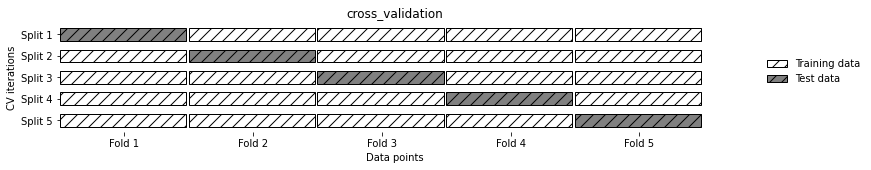

In [ ]:
import mglearn
# 5-겹 교차 검증에서의 데이터 분할
mglearn.plots.plot_cross_validation()

In [ ]:
# 교차 검증을 간편하게
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=0)

scores = cross_val_score(model_lr, X, y)
print( scores )

scores = cross_val_score(model_dt, X, y)
print( scores )

[0.96666667 1.         0.93333333 0.96666667 1.        ]
[0.96666667 0.96666667 0.9        0.96666667 1.        ]


- cross_val_score의 기본값은 5-겹 교차 검증이므로 정확도 값이 5개가 반환 <br>
(scikit-learn 0.22 부터 기본값은 5-겹, 기존 기본값 3-겹)

- 폴드의 수는 cv 매개변수를 사용해서 바꿀 수 있음



In [ ]:
scores = cross_val_score(model_lr, X, y, cv=3)
print( scores )

[0.98 0.96 0.98]


- 보통 교차 검증의 정확도를 간단하게 나타내려면 평균을 사용

In [ ]:
scores = cross_val_score(model_lr, X, y, cv=5)
print( scores.mean(), scores )

scores = cross_val_score(model_dt, X, y)
print( scores.mean(), scores )

0.9733333333333334 [0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9600000000000002 [0.96666667 0.96666667 0.9        0.96666667 1.        ]


여러 개의 평가 지표 반환 교차 검증 함수

[cross_validate()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

```
cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)
- return_train_score : 훈련 점수 포함 여부

Return
- 교차 검증 결과 정확도 점수의 배열

In [ ]:
# 분할마다 훈련과 테스트에 걸린 시간을 담은 여러 개의 평가 지표 딕셔너리를 반환
from sklearn.model_selection import cross_validate

res = cross_validate(model_lr, X, y, cv=5, return_train_score=True)
res

{'fit_time': array([0.02387166, 0.02585053, 0.02282453, 0.02389574, 0.02373147]),
 'score_time': array([0.00076151, 0.00073433, 0.00048828, 0.00047326, 0.00054026]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [ ]:
# 판다스를 사용하여 결과값을 출력하고 평균을 계산
import pandas as pd

df = pd.DataFrame(res)
display( df )
df.mean()

,fit_time,score_time,test_score,train_score
0,0.023872,0.000762,0.966667,0.966667
1,0.025851,0.000734,1.000000,0.966667
2,0.022825,0.000488,0.933333,0.983333
3,0.023896,0.000473,0.966667,0.983333
4,0.023731,0.000540,1.000000,0.975000


fit_time       0.024035
score_time     0.000600
test_score     0.973333
train_score    0.975000
dtype: float64

#### 교차 검증 장단점

- 테스트 세트에 골고루 각 샘플이 정확하게 한 번씩 들어감
- 교차 검증의 점수가 높으면 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화됨
- 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음
- 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용
> 5-겹의 경우 매 반복에서 4/5 (80%)의 데이터를 모델 학습에 사용. <br> 
> 10-겹의 경우 90%를 사용

- 연산 비용이 늘어나는 단점이 있음 (k배 더 느림)


### 계층별 k-겹 교차 검증 

- 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지는 않음

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 결과에서 볼 수 있듯이 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2이다.

- 이 데이터에 3-겹 교차 검증을 적용한다면 첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0이 됨

- 두 번째, 세 번째도 같은 방법으로 정확도는 0이 됨 

- 단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용

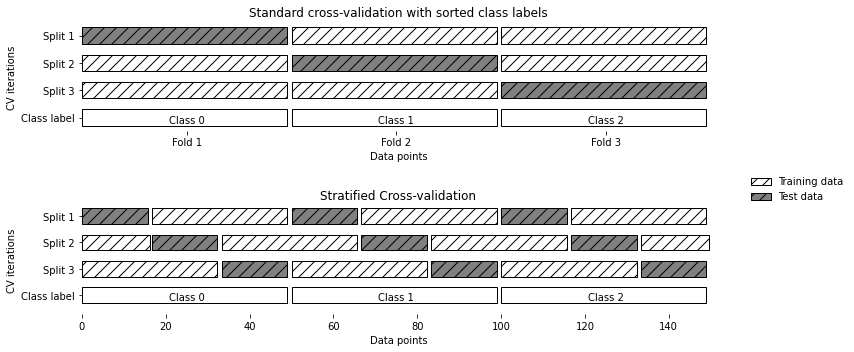

In [ ]:
# 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔
mglearn.plots.plot_stratified_cross_validation()

- 대부분 회귀에서는 k-겹 교차 검증
- 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동

In [ ]:
# cv 매개변수에 교차 검증 분할기 cross-validation splitter를 사용하여 
# 데이터를 분할할 때 세밀하게 제어
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
cross_val_score(model_lr, X, y, cv=kfold)

array([0., 0., 0.])

In [ ]:
# 데이터를 분할하기 전에 섞어주면 결과가 향상
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(model_lr, X, y, cv=kfold)
print( scores.mean(), scores )

0.9666666666666667 [0.98 0.96 0.96]


### 임의 분할 교차 검증 (shuffle-split cross-validation)

- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용
- train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용 가능
- 데이터 부분 샘플링(subsampling)하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됨



[ShuffleSplit()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

```
ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
```
- train_size 만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 (훈련 세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할

- n_splits 횟수만큼 반복

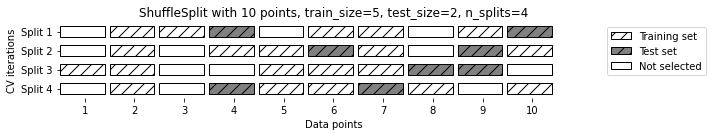

In [ ]:
# 10개의 데이터 포인트에 train_size=0.5, test_size=0.2, n_splits=4를 적용한 ShuffleSplit
mglearn.plots.plot_shuffle_split()

In [ ]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=4, train_size=0.5, test_size=0.2, random_state=0)
scores = cross_val_score(model_lr, X, y, cv=ss)
print( scores.mean(), scores )

0.9583333333333334 [1.         0.96666667 0.96666667 0.9       ]


### 그룹별 교차 검증 (groups cross-validation)

- 데이터 안에 매우 연관된 그룹이 있을 때
- 예: 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 의료 애플리케이션

- groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것으로 클래스 레이블과 혼동해서는 안됨

[GroupKFold()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html)

```
GroupKFold(n_splits=5)
```
- n_splits : 폴드 수 (2 이상)


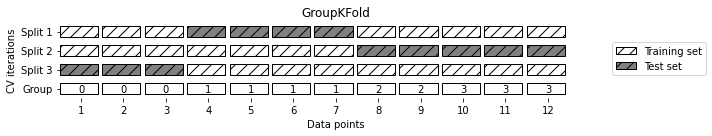

In [ ]:
# 레이블에 기반한 GroupKFold 분할
mglearn.plots.plot_group_kfold()

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같음
groups = [0,0,0,1,1,1,1,2,2,3,3,3]

gkf = GroupKFold(n_splits=3)
scores = cross_val_score(model_lr, X, y, groups=groups, cv=gkf)
print( scores.mean(), scores )

0.6722222222222222 [0.75       0.6        0.66666667]


### 반복 교차 검증

- 데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행

- RepeatedKFold : 회귀에 사용
- RepeatedStratifiedKFold : 분류에 사용

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

X = iris.data
y = iris.target
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
scores = cross_val_score(model_lr, X, y, cv=rskfold)
print( scores.mean(), scores )

0.9640000000000002 [0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 1.
 0.9        0.96666667 1.         1.         0.93333333 1.
 1.         0.93333333 0.96666667 1.         0.9        1.
 0.9        1.         1.         0.93333333 0.96666667 0.96666667
 0.93333333]


- 전체 검증 점수는 n_splits * n_repeats 개수만큼 만들어짐

# 그리드 서치 (Grid Search)

- 매개변수을 선택하는 것은 머신러닝에서 중요한 일

- GRID_SEARCH : 관심 있는 매개변수들을 대상으로 가능한 모든 조합 시도하는 것

### 검증 세트

- 매개변수를 조정하기 위해 테스트 세트를 사용하면 모델이 얼마나 좋은지 평가하는 것에 더 이상 사용할 수 없음
- 평가를 위해 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요

- 데이터를 세 개의 세트로 만들어 이 문제를 해결
 - 훈련 세트로는 모델을 작성
 - 검증 (또는 개발) 세트로는 모델의 매개변수를 선택
 - 테스트 세트로는 선택된 매개변수의 성능을 평가

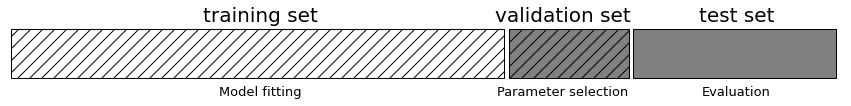

In [ ]:
mglearn.plots.plot_threefold_split()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
print(X_trainval.shape, X_test.shape)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)
print( X_train.shape, X_valid.shape )

best_score = 0
# 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = SVC(gamma=gamma, C=C)
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    if score > best_score:
      best_score = score
      best_parameters = {'C':C, 'gamma':gamma}

best_score, best_parameters

(112, 4) (38, 4)
(84, 4) (28, 4)


(1.0, {'C': 100, 'gamma': 0.001})

In [ ]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
svm = SVC(**best_parameters).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9736842105263158

## 교차 검증을 사용한 그리드 서치

In [ ]:
best_score = 0
# 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = SVC(gamma=gamma, C=C)
    score = cross_val_score(model, X_trainval, y_trainval, cv=5)
    score = score.mean()

    if score > best_score:
      best_score = score
      best_parameters = {'C':C, 'gamma':gamma}

best_score, best_parameters

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

In [ ]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듬
svm = SVC(**best_parameters).fit(X_trainval, y_trainval)
svm.score(X_test, y_test)

0.9736842105263158

- 5-겹 교차 검증으로 C와 gamma 설정에 대한 SVM 정확도를 평가하려면 36 x 5 = 180 개의 모델이 필요

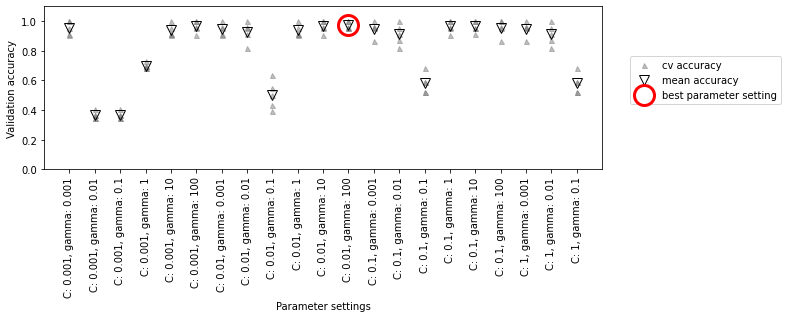

In [ ]:
# 최적의 매개변수를 선택하는 방법
# 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시
mglearn.plots.plot_cross_val_selection()

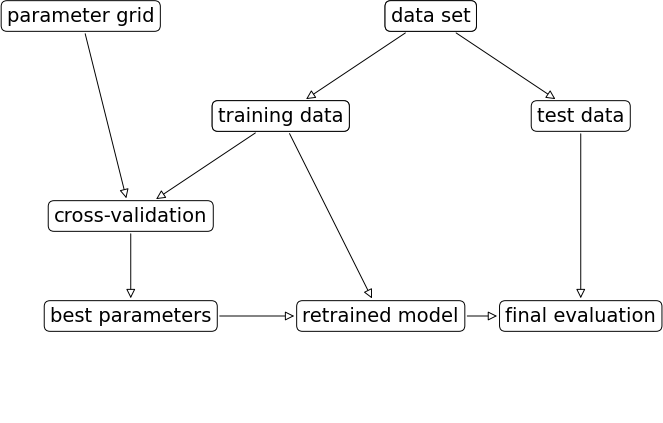

In [ ]:
# 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름
mglearn.plots.plot_grid_search_overview()

## GridSearchCV 메소드를 이용한 그리드서치

In [ ]:
# param_grid
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
param_grid 

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

- GridSearchCV 객체에 fit() 매서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동을 만듬

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict()와 score() 메서드 제공

- GridSearchCV 분류 : StratifiedKFold 회귀 : KFold

- 사용에 따라서는 predict_proba, decision_function도 제공

In [ ]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [ ]:
grid_search.best_score_, grid_search.best_params_

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

In [ ]:
grid_search.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- bast_score_ 속성에는 훈련 세트에서 수행한 교차 검증의 평균 정확도가 저장

- 최적 매개 변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_

- grid_search 객체가 predict와 score 메서드를 가지고 있으므로 예측이나 모델을 평가하기 위해 best_estimator_ 속성을 사용할 필요가 없음


## 교차 검증 결과 분석

- 교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는 데 도움이 됨

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(grid_search.cv_results_)
df.head().T

,0,1,2,3,4
mean_fit_time,0.00117211,0.000761461,0.000777197,0.000818586,0.000761175
std_fit_time,0.000396066,7.88355e-06,1.54898e-05,5.32577e-05,3.01697e-05
mean_score_time,0.000480843,0.000343895,0.000337601,0.000383663,0.000316954
std_score_time,0.000157308,1.81384e-05,1.20848e-05,6.78746e-05,6.39495e-06
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


### C와 gamma 시각화

 

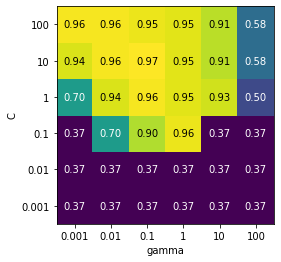

In [ ]:
import mglearn

# 교차 검증 평균 점수 히트맵 그래프
scores = np.array(df.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', 
                      xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])

### 바람직하지 못한 예

- 검색 범위가 적절하게 선택되지 않은 경우

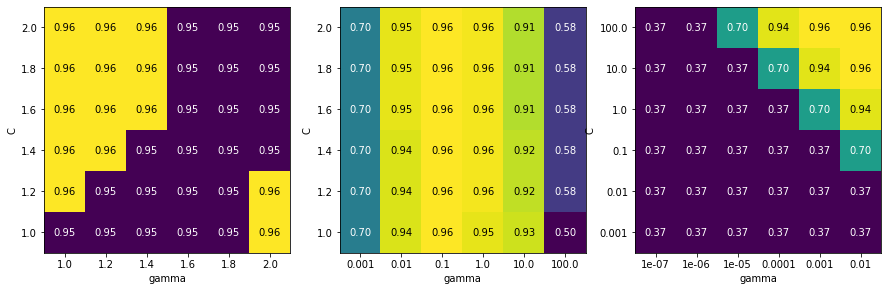

In [ ]:
import matplotlib.pyplot as plt

pg_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
pg_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
pg_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for pg, ax in zip([pg_linear, pg_log, pg_range], axes):
  grid_search = GridSearchCV(SVC(), param_grid=pg, cv=5).fit(X_train, y_train)
  scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
  mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', 
                      xticklabels=pg['gamma'],
                      yticklabels=pg['C'], ax=ax)

# 모델 평가

분류의 평가 지표

정확도, 오차 행렬, 분류 리포트,
정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

## 정확도 (Accuracy)

- 실제 데이터에서 에측 데이터가 얼마나 같은지를 판단하는 지표

 > \begin{equation}
\text{정확도(Accuracy)} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
\end{equation}

- 직관적으로 모델 예측 성능을 나타내는 평가 지표

## 오차행렬 (Confusion Matrix)

- 학습된 분류 모델이 예측을 수행하면서 얼마나 혼란스러워(confused) 하고 있는지 함께 보여주는 지표
- 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표


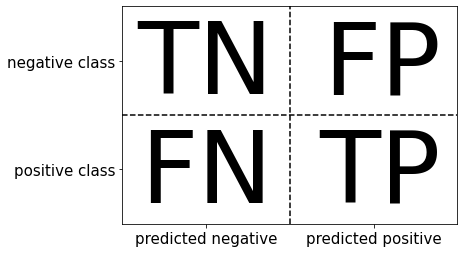

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

- True / False : 예측값과 실제값이 같은가 /틀린가
- Negative / Positive : 예측 결과 값이 부정(0) / 긍정(1)

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값은 역시 Negative 값 0
- FP : 예측값을 Positive 값 1로 예측 했는데 실제 값은 Negative 값 0
- FN : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

[confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
```
confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```
- y_true : 정답
- y_pred : 예측 결과

(1347, 64)

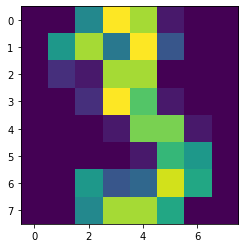

In [ ]:
from sklearn.datasets import load_digits

# 손글씨 데이터
digits = load_digits()
digits.keys()
digits.target_names
plt.imshow( digits.images[3] )
digits.target[3]

# 불균형 데이터셋 생성
y = digits.target == 9
X = digits.data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

In [ ]:
model_lr = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)
model_lr.score(X_train, y_train), model_lr.score(X_test, y_test)

(0.9977728285077951, 0.9844444444444445)

In [ ]:
from sklearn.metrics import confusion_matrix
pred_lr = model_lr.predict(X_test)
confusion_matrix(y_test, pred_lr)

array([[402,   1],
       [  6,  41]])

- TN FP
- FN TP


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
model_dt.score(X_train, y_train), model_dt.score(X_test, y_test)

(1.0, 0.9533333333333334)

In [ ]:
pred_dt = model_dt.predict(X_test)
confusion_matrix(y_test, pred_dt)

array([[394,   9],
       [ 12,  35]])

오차 행렬에서 정확도 재정의

> \begin{equation}
\text{Accuracy} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

## 정밀도(Precision)와 재현율(Recall)

 > \begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation} <br>
 > \begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

정밀도
 - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 거짓양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용
 - 양성 예측도(PPV) 라고도 함

재현율
 - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용
 - 거짓 음성(FN)을 피하는 것이 중요할 때
 - 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 함

- 정밀도가 상대적으로 더 중요한 지표인 경우
 - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 스팸 메일 판단 모델 : 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 메일을 아예 받지 못하게 됨

- 재현율이 상대적으로 더 중요한 지표인 경우
 - 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 암 판단 모델 : 실제 Positive인 암 환자를 Negative 음성으로 잘못 판단했을 경우 생명이 위험
 - 보험/금융 사기 적발 모델 : 실제 사기인 Positive 건을 Negative로 잘못 판단하면 회사에 손해가 큼